In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt # for drawing graphs
import pandas as pd

/home/petka/UJEP/PSM/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Defining Bayesian Structure
model = BayesianNetwork([('Guest', 'Host'), ('Price', 'Host')])

In [ ]:
# Defining the CPDs:
cpd_guest = TabularCPD('Guest', 3, [[0.33], [0.33], [0.33]])
cpd_price = TabularCPD('Price', 3, [[0.33], [0.33], [0.33]])
cpd_host = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['Guest', 'Price'], evidence_card=[3, 3])

In [ ]:
#print(cpd_guest)
#print(cpd_price)
print(cpd_host)

+---------+----------+----------+-----+----------+----------+----------+
| Guest   | Guest(0) | Guest(0) | ... | Guest(2) | Guest(2) | Guest(2) |
+---------+----------+----------+-----+----------+----------+----------+
| Price   | Price(0) | Price(1) | ... | Price(0) | Price(1) | Price(2) |
+---------+----------+----------+-----+----------+----------+----------+
| Host(0) | 0.0      | 0.0      | ... | 0.0      | 1.0      | 0.5      |
+---------+----------+----------+-----+----------+----------+----------+
| Host(1) | 0.5      | 0.0      | ... | 1.0      | 0.0      | 0.5      |
+---------+----------+----------+-----+----------+----------+----------+
| Host(2) | 0.5      | 1.0      | ... | 0.0      | 0.0      | 0.0      |
+---------+----------+----------+-----+----------+----------+----------+


In [ ]:
# Associating the CPDs with the network structure.
model.add_cpds(cpd_guest, cpd_price, cpd_host)

In [ ]:
model.check_model()

True

In [ ]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination
 
infer = VariableElimination(model)
posterior_p = infer.query(['Host'], evidence={'Guest': 2, 'Price': 0})
print(posterior_p)

+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      0.0000 |
+---------+-------------+
| Host(1) |      1.0000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


In [ ]:
# Define the Bayes network
G = nx.DiGraph()
G.add_nodes_from(['Prize', 'Guess', 'Host'])
G.add_edges_from([('Prize', 'Host'), ('Guess', 'Host')])

In [ ]:
# Set the node positions
pos = {'Prize': (0, 1), 'Guess': (1, 1), 'Host': (1, 1)}

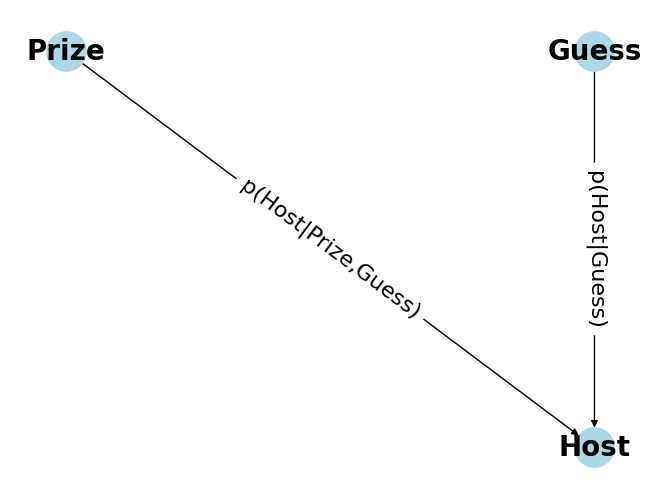

In [ ]:
# Draw the Bayes network
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=20, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={('Prize', 'Host'): 'p(Host|Prize,Guess)', ('Guess', 'Host'): 'p(Host|Guess)'}, font_size=16)
plt.show()